<a href="https://colab.research.google.com/github/lukasdekanovsky/Become_PythonDeveloper_AI/blob/main/KONVOLUCNI_(CNN)_Rozpozn%C3%A1v%C3%A1n%C3%AD_%C4%8D%C3%ADsel_28_x_28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neuronová síť pro rozpoznávání čísel


###Úkol ML1.2) Rozpoznání vaší číslice
V sekci použití neuronové sítě je stáhnut obrázek přes curl, který představuje jednu z číslic z MNIST. Obrázek si stáhněte do svého počítače, otevřete v bitmapovém editoru (Malování, GIMP, Photoshop, ...) a ručně tam napište jinou číslici. Následně číslici nahrajte do colabu a nechte vaší naučenou síť odhadnout o jakou číslici se jedná.

In [ ]:
import tensorflow as tf

In [ ]:
# nahrání trénovacích a testovacích dat z datové sady

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
#formát dat v datové sadě emnist
print(x_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

5


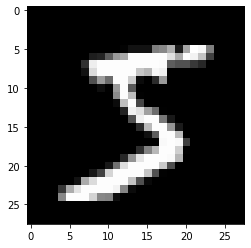

In [ ]:
#vyobrazení dat graficky
from matplotlib import pyplot as plt

pixels = x_train[0]
plt.imshow(pixels, cmap="gray")
print(y_train[0])

In [ ]:
#Datová normalizace - musíme zachovat rozsah čísel od 0 - 1
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
#Tvorba neuronové sítě
vstupni = tf.keras.layers.Flatten(input_shape=(28, 28))    #vstupni neurony  - z každého pixelu a jsou zploštělé, zasebou

skryta = tf.keras.layers.Dense(128, activation="relu")    #skrytá vrstva neuronů s aktivačním parametrem "relu" = míra vzrušivosti neuronu

zahazujici = tf.keras.layers.Dropout(0.1)     #náhodně vyřadí data z 10% neuronů - doporuč 10-20

vystupni = tf.keras.layers.Dense(10)  #výstupních 9 neuronů protože 9 číslic

neuronova_sit = tf.keras.models.Sequential([vstupni, skryta, zahazujici, vystupni])

In [ ]:
#Predikce sítě
                          #neuronové výstupy pro první 4 obrázky
odhady = neuronova_sit(x_test[:5]).numpy()
odhady = tf.nn.softmax(odhady).numpy()
skutecnost = y_test[:5]

for iodhad, odhad in enumerate(odhady):
  for cislo, pravdepodobnost in enumerate(odhad):
    print(f"{cislo}, {round(pravdepodobnost*100, 2)}%")
  print(f"skutecnost: {skutecnost[iodhad]}\n")


#nyní neni neuronová síť naučená - generuje náhodné údaje a není konfrontována se správností odhadu

0, 8.53%
1, 5.49%
2, 9.65%
3, 10.73%
4, 10.76%
5, 11.45%
6, 14.46%
7, 12.98%
8, 7.94%
9, 8.01%
skutecnost: 7

0, 16.38%
1, 10.52%
2, 8.52%
3, 8.14%
4, 6.03%
5, 13.15%
6, 5.95%
7, 18.87%
8, 5.35%
9, 7.09%
skutecnost: 2

0, 8.85%
1, 11.9%
2, 12.66%
3, 7.58%
4, 13.21%
5, 8.23%
6, 7.12%
7, 14.96%
8, 9.61%
9, 5.87%
skutecnost: 1

0, 12.96%
1, 8.75%
2, 8.38%
3, 9.75%
4, 6.95%
5, 15.41%
6, 12.52%
7, 11.1%
8, 4.01%
9, 10.16%
skutecnost: 0

0, 10.92%
1, 6.65%
2, 13.75%
3, 8.17%
4, 11.22%
5, 11.98%
6, 10.76%
7, 13.37%
8, 8.38%
9, 4.8%
skutecnost: 4



In [ ]:
#nyní si zadefinujeme ztrátovou funkci - směřování odhadu správným směrem
ztratova_funkce = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
#optimalizace neuronové sítě
neuronova_sit.compile(optimizer="adam", loss=ztratova_funkce, metrics=["accuracy"])


In [ ]:
#učení

        #treninková data 0-1 pixely  #výsledky #počet tréninkových epoch
neuronova_sit.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2735 - accuracy: 0.9201
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1254 - accuracy: 0.9625
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0889 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0721 - accuracy: 0.9784
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0579 - accuracy: 0.9822


In [ ]:
#vyhodnocení učení
neuronova_sit.evaluate(x_test, y_test)
#pracuje s 97,71% úspěšností na testovacích datech (vidí je poprvé)

313/313 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9771


[0.07354142516851425, 0.9771000146865845]

In [ ]:
!curl -O https://raw.githubusercontent.com/do-community/tensorflow-digit-recognition/master/test_img.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   393  100   393    0     0   1477      0 --:--:-- --:--:-- --:--:--  1471


In [ ]:
#ověření funkčnosti na našem obrázku
from google.colab import files
nahrany_soubor = files.upload()

Saving test_img (1).png to test_img (1).png


In [ ]:
#zobrazení našeho obrázku
from PIL import Image
import numpy as np

jmeno_souboru = list(nahrany_soubor.keys())[0]
obrazek = Image.open(jmeno_souboru)
display(obrazek)

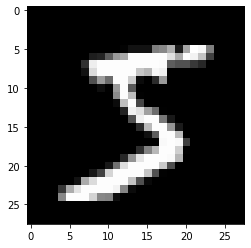

In [ ]:
#přeformátujeme si náš obrázek do podoby v jaké se učila neuronová síť
from matplotlib import pyplot as plt
plt.imshow(x_train[0], cmap="gray")

In [ ]:
from PIL import ImageOps

x = ImageOps.grayscale(obrazek) # odstiny_sedi
x = ImageOps.invert(x) # inverze_barev
#x = x.convert('1') # binarizovany_obrazek
x = np.array(x)
x = x / 255

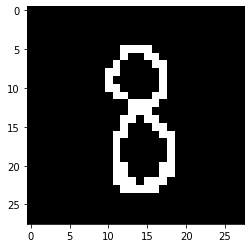

In [ ]:
plt.imshow(x, cmap="gray")

In [ ]:
print(x.shape)

(28, 28)


In [ ]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 28, 28)

In [ ]:
odhady = neuronova_sit(x).numpy()
odhady = tf.nn.softmax(odhady).numpy()

for iodhad, odhad in enumerate(odhady):
    for cislo, pravdepodobnost in enumerate(odhad):
        print(f"{cislo},{round(pravdepodobnost*100, 2)}%")

0,0.06%
1,0.03%
2,0.51%
3,0.69%
4,0.0%
5,0.03%
6,0.02%
7,0.02%
8,98.32%
9,0.3%


**Neuronová síť rozpoznala číslo 8 nakreslené v malování s pravděpodobností 98,32 % (odhad)**